In [1]:
#importing libraries
import pandas as pd
import numpy as np  
from matplotlib import pyplot as plt 
import seaborn as sns
import requests
%matplotlib inline

In [2]:
#loading the dataset
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(url)
print('Dataset loaded Successfully')
df.head()

Dataset loaded Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Text(0, 0.5, 'Percentage Score')

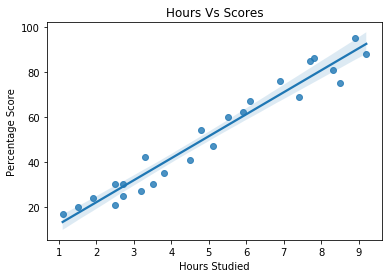

In [3]:
# Plotting the distribution of scores
plot = sns.regplot(x='Hours',y='Scores',data=df)
plot.set_title("Hours Vs Scores")
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')

### From the above graph, we can conclude that the number of hours studied and percentage of score is having a positive linear relation.

### Preparing the data

In [4]:
# checking for NAN values
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
# Extracting the input and output columns from dataframe
X = df.drop('Scores',axis='columns',inplace=False)
y = df['Scores']

In [7]:
# Now, Splitting the data into training and test data
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

## Training the Algorithm

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
print('Trained Successful')

Trained Successful


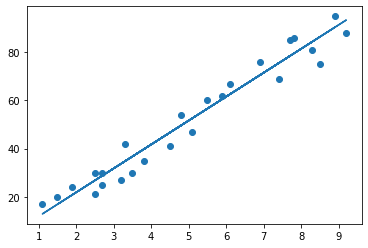

In [11]:
# Plotting the regression line
line = lin_reg.coef_*X+lin_reg.intercept_

# Plotting for the test data
plt.scatter(X.values, y.values)
plt.plot(X.values, line);
plt.show()

## Making Predictions

In [12]:
# Now, it's time to predict the output for test data
predicted = lin_reg.predict(X_test)

In [13]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': predicted})  
df

,Actual,Predicted
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


### What will be predicted score if a student studies for 9.25 hrs/ day?

In [14]:
hours_per_day = 9.25
prediction = lin_reg.predict([[hours_per_day]])
print("No of Hours = {}".format(hours_per_day))
print("Predicted Score = {}".format(prediction[0]))

No of Hours = 9.25
Predicted Score = 93.89272889341655


## Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, i have chosen the mean square error.

In [16]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, predicted)) 

Mean Absolute Error: 4.130879918502486


In [18]:
# Accuracy_score of the model
score = lin_reg.score(X_test,y_test)
print('Accuracy_score is {}'.format(score*100))

Accuracy_score is 93.67661043365054
